In [1]:
import pandas as pd
import missingno as msno
import geopandas
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
import plotly.graph_objects as go
import numpy as np

In [2]:
#I don't want an additional index column to be added
happinessScores = pd.read_csv('AnalysisData\\LadderScores_2005-2018.csv', index_col=0)
happinessScoresNoNulls = pd.read_csv('AnalysisData\\LadderScoresNoNulls_2014-2018.csv', index_col=0)
happiness_money = pd.read_csv('AnalysisData\\world_happiness_other_indicators.csv', index_col=0)

<h2> Insights on ladder score </h2>

In [3]:
happiness_money['Regional indicator'].value_counts()

Sub-Saharan Africa                    39
Western Europe                        21
Latin America and Caribbean           21
Central and Eastern Europe            18
Middle East and North Africa          17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: Regional indicator, dtype: int64

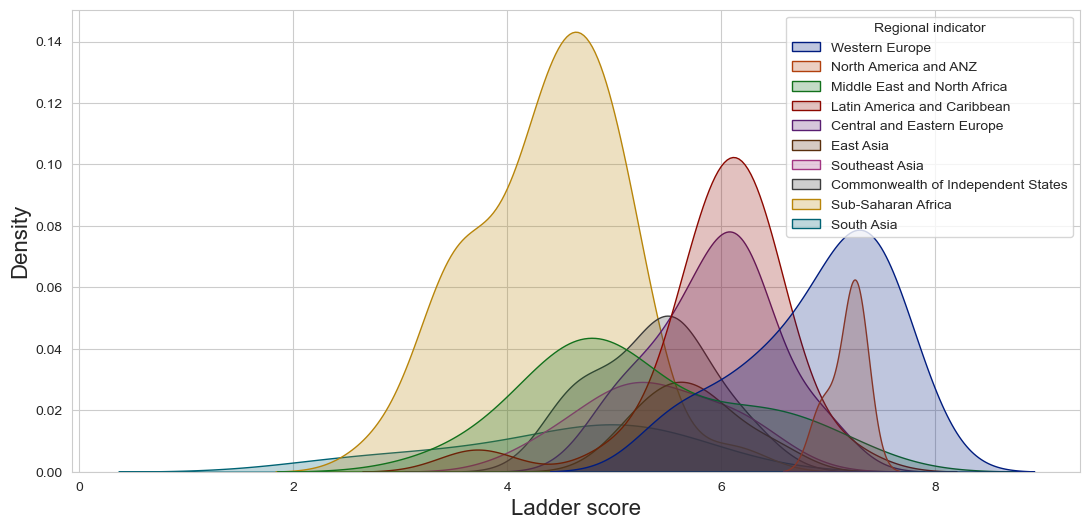

In [142]:
plt.figure(figsize=(13,6))
sb.kdeplot( x = happiness_money['Ladder score'],
            hue= happiness_money['Regional indicator'],
            palette= 'dark',
            fill = True)
plt.ylabel('Density', fontsize = 16)
plt.xlabel('Ladder score', fontsize = 16)
plt.savefig('media4.0\\happiness_density_per_region.jpg', bbox_inches = 'tight')

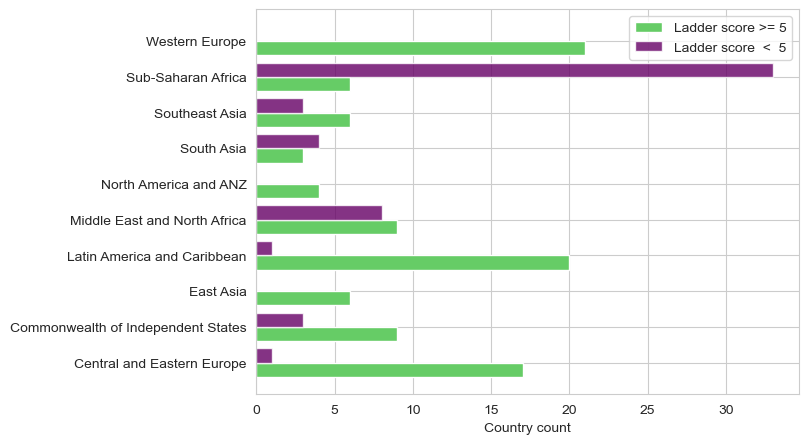

In [166]:
labels = happiness_money.groupby('Regional indicator').groups.keys()

happy_countreis = happiness_money.groupby('Regional indicator')['Ladder score'].apply( lambda x: x[x >= 5].count()).reset_index(name = 'count')
sad_countreis = happiness_money.groupby('Regional indicator')['Ladder score'].apply( lambda x: x[x < 5].count()).reset_index(name = 'count')


x = np.arange(len(labels))
width = 0.4

fig, ax = plt.subplots()
fig.set_figwidth(7)
fig.set_figheight(5)

rect1 = ax.barh(x - width/2, happy_countreis['count'], width, label = 'Ladder score >= 5', color = '#66cc66')
rect2 = ax.barh(x + width/2, sad_countreis['count'], width, label= 'Ladder score  <  5', color = '#660066', alpha = 0.8)


ax.set_xlabel('Country count')
ax.set_yticks(x, labels)
ax.legend()
fig.savefig('media4.0\\region_count.jpg', bbox_inches = 'tight')

In [150]:
happiness_money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 153
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      154 non-null    object 
 1   Country Code                      154 non-null    object 
 2   Regional indicator                154 non-null    object 
 3   Ladder score                      154 non-null    float64
 4   Standard error of ladder score    154 non-null    float64
 5   upperwhisker                      154 non-null    float64
 6   lowerwhisker                      154 non-null    float64
 7   Logged GDP per capita             154 non-null    float64
 8   Social support                    154 non-null    float64
 9   Healthy life expectancy           154 non-null    float64
 10  Freedom to make life choices      154 non-null    float64
 11  Generosity                        154 non-null    float64
 12  Percepti

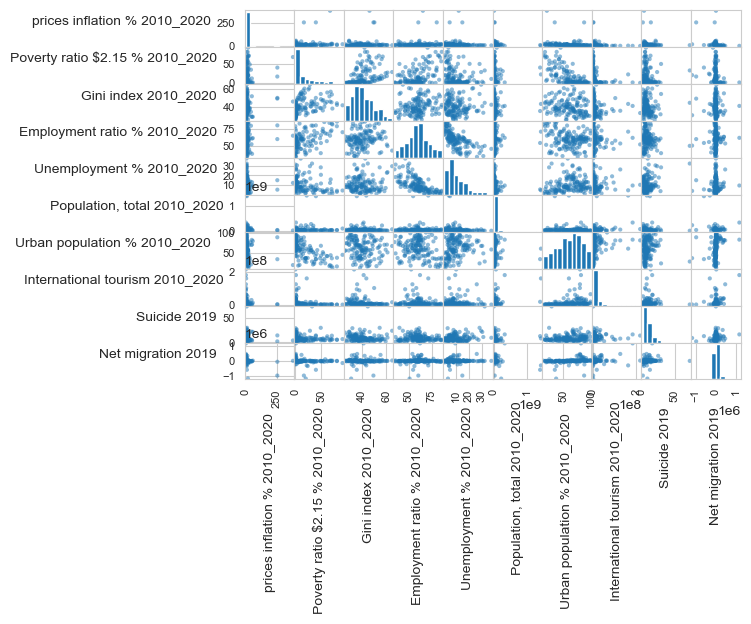

In [159]:
axes = pd.plotting.scatter_matrix(happiness_money.iloc[:, 15: ] )
for ax in axes.flatten():
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
    ax.xaxis.label.set_rotation(90)

In [160]:
data = happiness_money.drop(columns = ['Standard error of ladder score', 'upperwhisker', 'lowerwhisker']).dropna().reset_index()

In [161]:
data

,index,Country name,Country Code,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,...,prices inflation % 2010_2020,Poverty ratio $2.15 % 2010_2020,Gini index 2010_2020,Employment ratio % 2010_2020,Unemployment % 2010_2020,"Population, total 2010_2020",Urban population % 2010_2020,International tourism 2010_2020,Suicide 2019,Net migration 2019
0,0,Finland,FIN,Western Europe,7.8087,10.639267,0.954330,71.900826,0.949172,-0.059482,...,4.065954,0.1,28.3,57.563999,10.360000,5521606.0,85.446,4226000.0,15.3,15558.0
1,1,Denmark,DNK,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,...,3.416268,0.5,28.7,63.359001,7.800000,5814422.0,87.994,33093000.0,10.7,23305.0
2,2,Switzerland,CHE,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,...,2.426041,0.1,34.3,65.905998,4.920000,8575280.0,73.849,11818000.0,14.5,43546.0
3,3,Iceland,ISL,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,...,12.694394,0.2,31.8,75.432999,7.560000,360563.0,93.855,2488000.0,11.9,5152.0
4,4,Norway,NOR,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,...,3.753931,0.3,31.6,65.700996,4.680000,5347896.0,82.616,6252000.0,11.8,25564.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,147,Botswana,BWA,Sub-Saharan Africa,3.4789,9.711204,0.779122,58.924454,0.821328,-0.250394,...,12.702188,17.7,60.5,52.133999,22.610001,2499702.0,70.172,2344000.0,16.1,2933.0
129,148,Tanzania,TZA,Sub-Saharan Africa,3.4762,7.967665,0.688933,57.496075,0.821540,0.109669,...,16.001094,56.2,40.5,85.433998,3.470000,59872579.0,34.500,1527000.0,4.3,-64819.0
130,149,Central African Republic,CAF,Sub-Saharan Africa,3.4759,6.625160,0.319460,45.200001,0.640881,0.082410,...,14.898684,61.9,56.2,67.973000,5.716000,5209324.0,41.770,120500.0,12.3,-36942.0
131,150,Rwanda,RWA,Sub-Saharan Africa,3.3123,7.600104,0.540835,61.098846,0.900589,0.055484,...,15.438214,66.1,52.0,84.151001,1.170000,12835028.0,17.313,1711000.0,5.6,-11823.0


<AxesSubplot:>

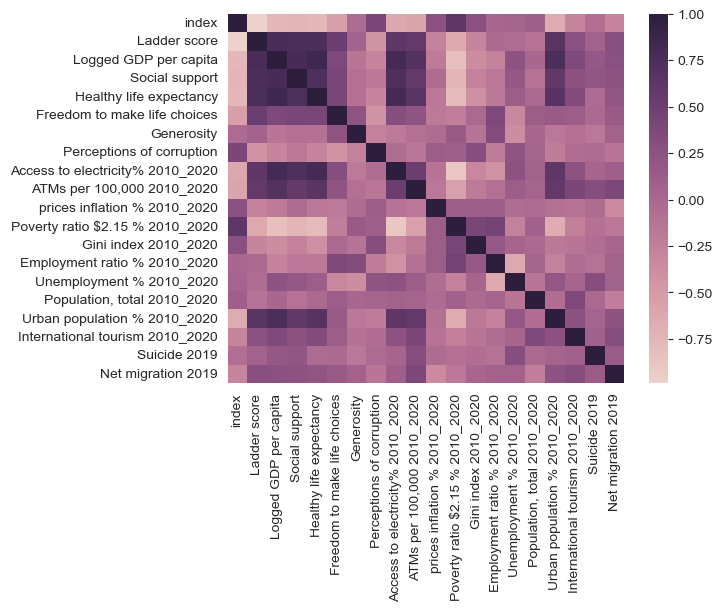

In [163]:
corrmat = data.corr()
sb.heatmap(corrmat, cmap=sb.cubehelix_palette(as_cmap=True))

<h2> insights on weatlh measure </h2>

In [168]:
happiness_money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 153
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      154 non-null    object 
 1   Country Code                      154 non-null    object 
 2   Regional indicator                154 non-null    object 
 3   Ladder score                      154 non-null    float64
 4   Standard error of ladder score    154 non-null    float64
 5   upperwhisker                      154 non-null    float64
 6   lowerwhisker                      154 non-null    float64
 7   Logged GDP per capita             154 non-null    float64
 8   Social support                    154 non-null    float64
 9   Healthy life expectancy           154 non-null    float64
 10  Freedom to make life choices      154 non-null    float64
 11  Generosity                        154 non-null    float64
 12  Percepti

In [180]:
wealth_indicators = happiness_money.iloc[:, [0, 1,2,3, 7, 14,15, 16, 17, 18, 19, 20, 24] ]

<AxesSubplot:>

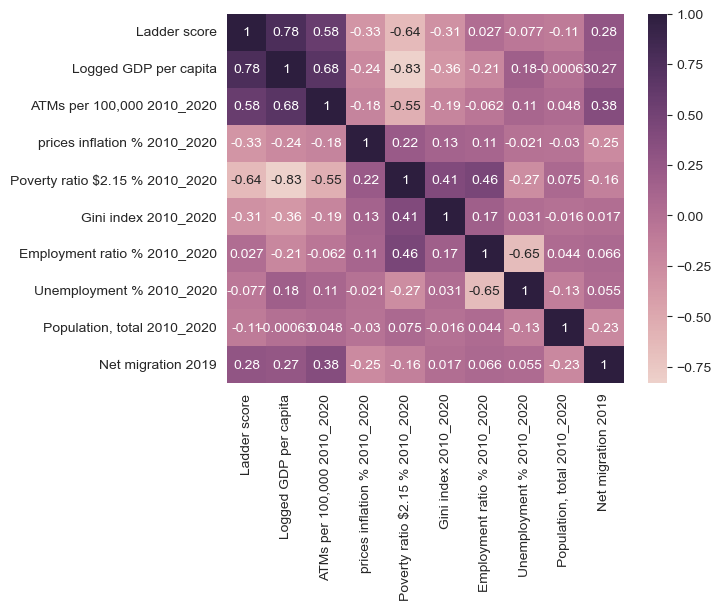

In [181]:
corrmat = wealth_indicators.corr()
sb.heatmap(corrmat, cmap=sb.cubehelix_palette(as_cmap=True), annot=True)

<AxesSubplot:>

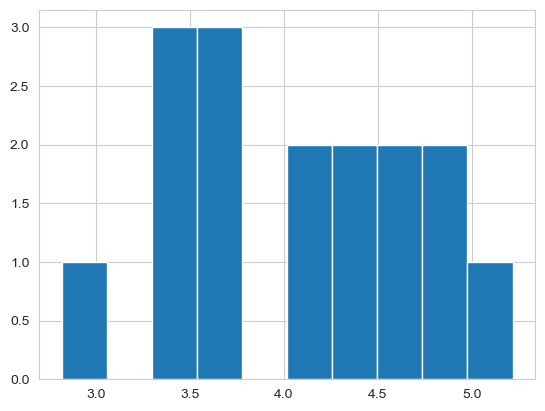

In [173]:
wealth_indicators[wealth_indicators['Poverty ratio $2.15 % 2010_2020'] > 50 ]['Ladder score'].hist()

<AxesSubplot:>

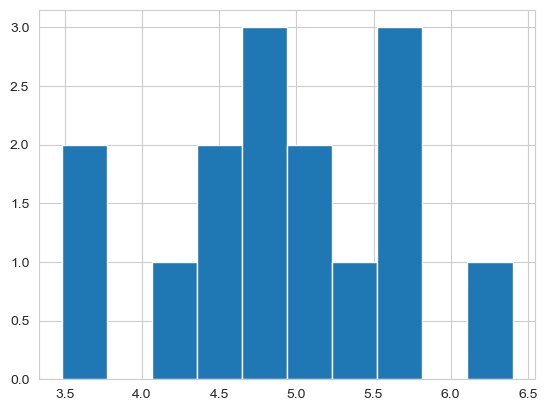

In [177]:
wealth_indicators[wealth_indicators['Unemployment % 2010_2020'] > 20 ]['Ladder score'].hist()

<AxesSubplot:>

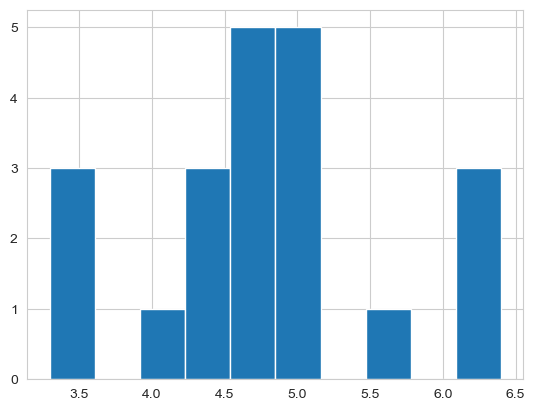

In [184]:
wealth_indicators[wealth_indicators['Net migration 2019'] < -50000]['Ladder score'].hist()

<AxesSubplot:xlabel='Ladder score', ylabel='Net migration 2019'>

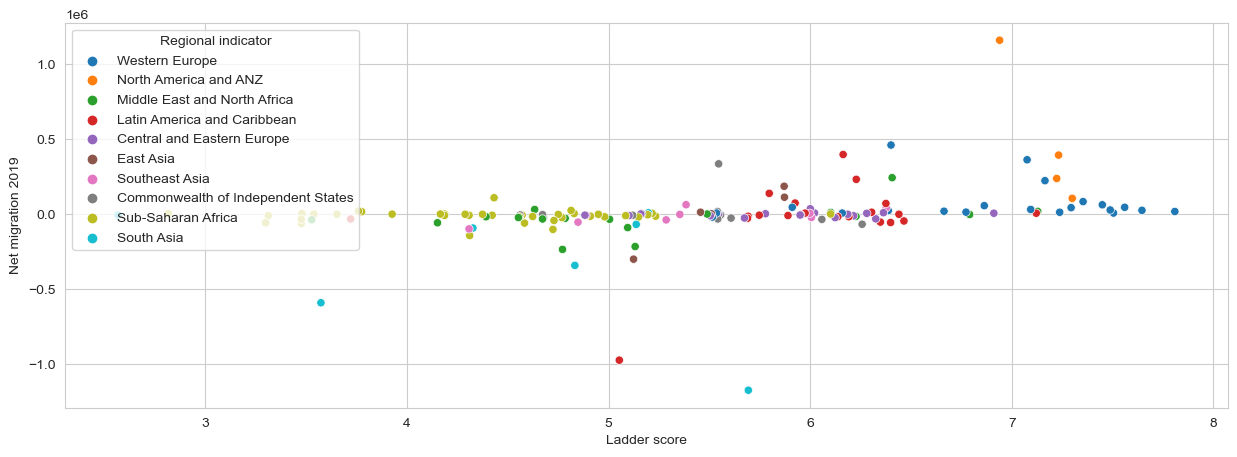

In [187]:
plt.figure(figsize=(15, 5))
sb.scatterplot(x = wealth_indicators['Ladder score'],
               y = wealth_indicators['Net migration 2019'],
               hue= wealth_indicators['Regional indicator']
               )

<h2> GDP vs Ladder score </h2>

In [188]:
gdpdf = pd.read_csv('AnalysisData\\GDP_en_csv_v2_4696300.csv')
migrationdf = pd.read_csv('AnalysisData\\API_SM.POP.NETM_DS2_en_csv_v2_4770395.csv', skiprows=3)

In [210]:
happiness2011_2018 = happinessScores.iloc[:, [0, 1, 8, 9, 10, 11, 12, 13, 14, 15]].dropna()

In [219]:
happinessScoresNoNulls[happinessScoresNoNulls['LadderScore2014'] < 4.2]

,Country name,Country Code,2011,2012,2013,2014,2015,2016,2017,2018
13,Benin,BEN,3.870280,3.193469,3.479413,3.347419,3.624664,4.007358,4.853181,5.819827
17,Botswana,BWA,3.519921,4.835939,4.128299,4.031197,3.761965,3.498937,3.504881,3.461366
19,Bulgaria,BGR,3.875382,4.222297,3.993021,4.438440,4.865401,4.837561,5.096902,5.098814
22,Cambodia,KHM,4.161225,3.898707,3.674467,3.883306,4.162165,4.461259,4.585842,5.121838
42,Egypt,EGY,4.174159,4.204157,3.558520,4.885073,4.762538,4.556741,3.929344,4.005451
55,Guinea,GIN,4.044569,3.651555,3.901793,3.412483,3.504694,3.602855,4.873723,5.252227
88,Malawi,MWI,3.946063,4.279270,4.035084,4.563080,3.867638,3.476493,3.416863,3.334634
102,Nepal,NPL,3.809445,4.233245,4.604577,4.975015,4.812437,5.099540,4.736692,4.910087
122,Rwanda,RWA,4.097436,3.333048,3.466388,3.595678,3.483109,3.332990,3.108374,3.561047
124,Senegal,SEN,3.834202,3.668737,3.647367,4.394777,4.617001,4.594534,4.683025,4.769377


In [340]:
#Is there a country with drastic change in happiness score?
happinessScoresNoNulls[happinessScoresNoNulls['LadderScore2015'] < 3.4]

,Country name,Country Code,LadderScore2014,LadderScore2015,LadderScore2016,LadderScore2017,LadderScore2018
61,Liberia,LBR,4.571419,2.701591,3.354676,4.424491,4.134853
118,Yemen,YEM,3.967958,2.982674,3.825631,3.253560,3.057514


In [117]:
#Is there a country with drastic change in happiness score? there shouldn't if the measure is valid
happinessScoresNoNulls[happinessScoresNoNulls['LadderScore2014'] > 7.4]

,Country name,Country Code,LadderScore2014,LadderScore2015,LadderScore2016,LadderScore2017,LadderScore2018
29,Denmark,DNK,7.507559,7.514425,7.557783,7.593702,7.648786
50,Israel,ISR,7.400570,7.079411,7.159011,7.331036,6.927179
80,Norway,NOR,7.444471,7.603434,7.596332,7.578745,7.444262
101,Switzerland,CHE,7.492804,7.572137,7.458520,7.473593,7.508587


In [142]:
#Lets write a code to determine changes with more than one points in general, to just the top 10 or lowest ten
happinessScoresNoNulls[happinessScoresNoNulls['LadderScore2018'] - happinessScoresNoNulls['LadderScore2014'] < -1 ]


,Country name,Country Code,LadderScore2014,LadderScore2015,LadderScore2016,LadderScore2017,LadderScore2018
66,Malawi,MWI,4.563080,3.867638,3.476493,3.416863,3.334634
108,Turkmenistan,TKM,5.787379,5.791460,5.887052,5.229149,4.620602
116,Venezuela,VEN,6.136096,5.568800,4.041115,5.070751,5.005663


In [350]:
#Lets write a code to determine changes with more than one points in general, to just the top 10 or lowest ten
happinessScoresNoNulls[happinessScoresNoNulls['LadderScore2018'] - happinessScoresNoNulls['LadderScore2014'] > 1 ]


,Country name,Country Code,LadderScore2014,LadderScore2015,LadderScore2016,LadderScore2017,LadderScore2018
10,Benin,BEN,3.347419,3.624664,4.007358,4.853181,5.819827
16,Burkina Faso,BFA,3.481348,4.418930,4.205635,4.646891,4.927236
17,Cambodia,KHM,3.883306,4.162165,4.461259,4.585842,5.121838
18,Cameroon,CMR,4.240441,5.037965,4.816232,5.074051,5.250738
20,Chad,TCD,3.460183,4.322675,4.029350,4.558937,4.486325
24,Congo (Brazzaville),COG,4.056013,4.690830,4.119493,4.883991,5.490214
43,Guinea,GIN,3.412483,3.504694,3.602855,4.873723,5.252227
52,Ivory Coast,CIV,3.570369,4.445039,4.542546,5.037735,5.268375
57,Kosovo,XKX,5.000375,5.077461,5.759412,6.149200,6.391826
105,Togo,TGO,2.838959,3.768302,3.878578,4.360805,4.022895


In [348]:
def plot_ladder_score_series(country, start_year = 2):
    plt.plot(
        happinessScores.groupby('Country name').get_group(country).iloc[:, start_year:].melt( var_name = 'Year', value_name = 'Ladder score')['Year'],
        happinessScores.groupby('Country name').get_group(country).iloc[:, start_year:].melt( var_name = 'Year', value_name = 'Ladder score')['Ladder score'], '-^', label = country)
    plt.xticks( happinessScores.groupby('Country name').get_group(country).iloc[:, start_year:].melt( var_name = 'Year', value_name = 'Ladder score')['Year'], fontsize = 14 )
    plt.yticks( [3,4, 5, 6, 7], fontsize = 14 )
    plt.xlabel('Years', fontsize = 14)
    plt.ylabel('Ladder score', fontsize = 14)

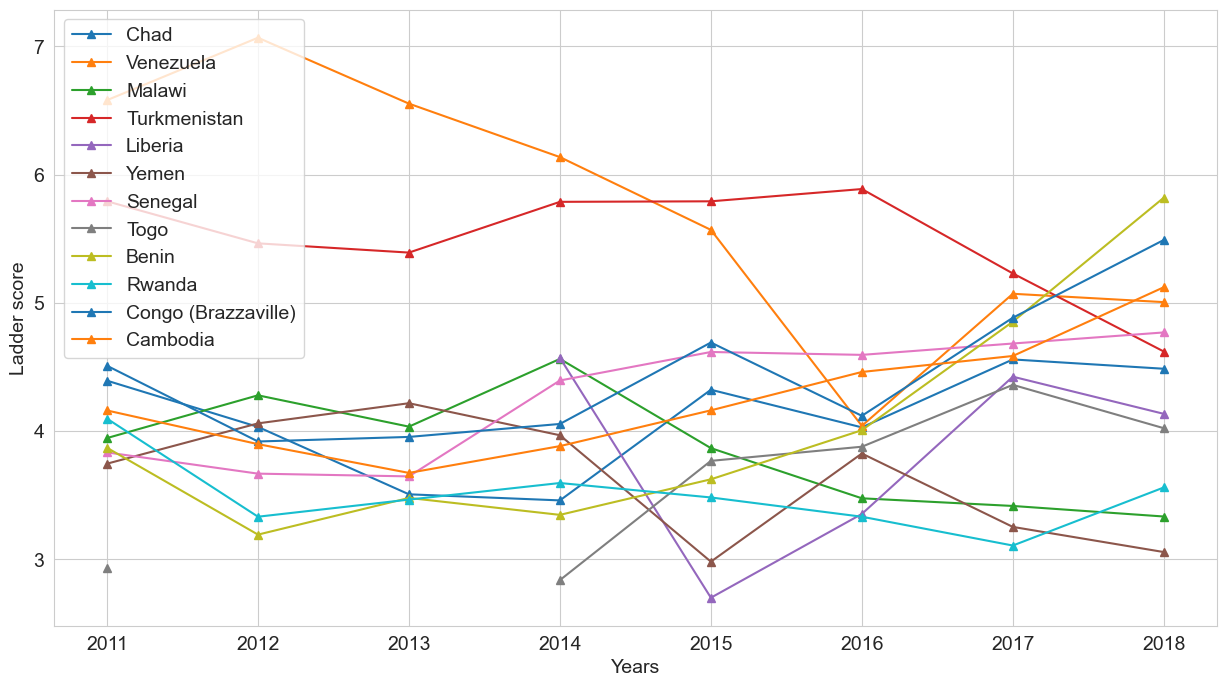

In [349]:
#plot all the countries with big changes as a line plot before the casaulity analysis
plt.figure(figsize=(15, 8))

plot_ladder_score_series('Chad', 8)
plot_ladder_score_series('Venezuela', 8)
plot_ladder_score_series('Malawi', 8)
plot_ladder_score_series('Turkmenistan', 8)
plot_ladder_score_series('Liberia', 8)
plot_ladder_score_series('Yemen', 8)
plot_ladder_score_series('Senegal', 8)
plot_ladder_score_series('Togo', 8)
plot_ladder_score_series('Benin', 8)
plot_ladder_score_series('Rwanda', 8)
plot_ladder_score_series('Congo (Brazzaville)', 8)
plot_ladder_score_series('Cambodia', 8)

plt.legend(fontsize = 14)
plt.savefig('media4.0\\sad_ladder_score_changes.jpg', bbox_inches = 'tight')

#gdpdf.groupby('Country Name').get_group('Chad').iloc[:, 49:63].melt( var_name = 'Year', value_name = 'gdp' ).plot()

In [ ]:
plt.figure(figsize=(13, 8))

plot_ladder_score_series('Chad', 8)
plot_ladder_score_series('Venezuela', 8)
plot_ladder_score_series('Malawi', 8)
plot_ladder_score_series('Turkmenistan', 8)
plot_ladder_score_series('Togo', 8)
plot_ladder_score_series('Benin', 8)
plot_ladder_score_series('Rwanda', 8)
plot_ladder_score_series('Congo (Brazzaville)', 8)
plot_ladder_score_series('Cambodia', 8)

plt.legend(fontsize = 14)
plt.savefig('media4.0\\sad_ladder_score_changes.jpg', bbox_inches = 'tight')

<h2> Causality Analysis </h2>
<p> Perform causality analysis between ladder score and gdp for countries whose Ladder score changed by 2 scores in the previous section </p>

In [ ]:
happinessScores.groupby('Country name').get_group('Chad').iloc[:, 2:].melt( var_name = 'Year', value_name = 'Ladder score' ).plot()
gdpdf.groupby('Country Name').get_group('Chad').iloc[:, 49:64].melt( var_name = 'Year', value_name = 'gdp' ).plot()

<h2> PCA </h2>

In [177]:
from sklearn.decomposition import PCA

In [267]:
X = data.iloc[:, 5:] #skip country and ladder score columns
y = data.iloc[:, 4] #ladder score col

scaler = MinMaxScaler()
X_std = scaler.fit_transform(X)

In [268]:
pca = PCA(3)
pca.fit(X_std)
pca.explained_variance_ratio_
#cumsum = np.cumsum(pca.explained_variance_ratio_)
#d = np.argmax(cumsum >= 0.85) + 1


array([0.44342992, 0.15157341, 0.07033774])

In [269]:
x_reduced = pca.fit_transform(X)

<AxesSubplot:>

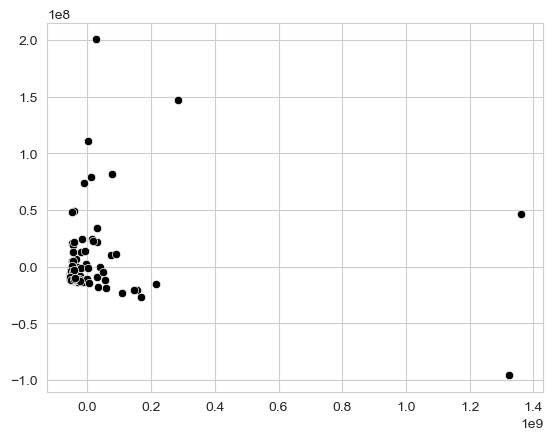

In [270]:
sb.scatterplot(x = x_reduced.T[0], y = x_reduced.T[1],
             color='black')

C:\Users\eilaf\anaconda3\envs\datakougi\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


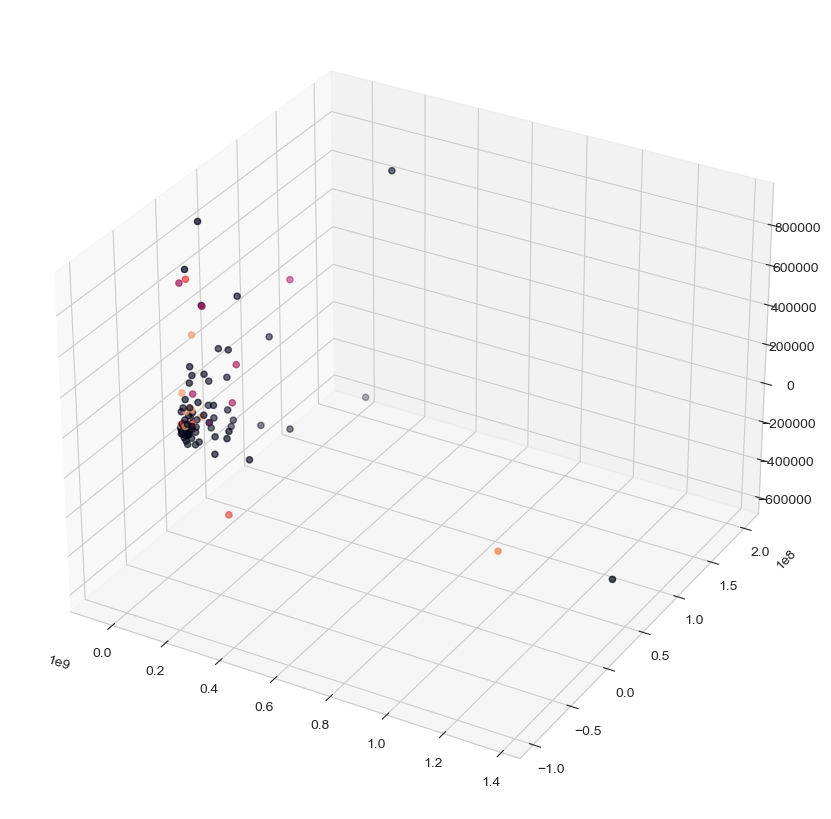

In [271]:
datax = x_reduced.T[0]
datay = x_reduced.T[1]
dataz = x_reduced.T[2]
#labels_ = sampled.map(lambda x: cluster.predict(x)) not working
labels = kmeans.predict(sampled)

fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig)

ax.scatter(datax, datay, dataz, c = labels)

<h2> k_means Clustering </h2>

In [286]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [312]:

scaler = StandardScaler()

X = scaler.fit_transform(data.iloc[:, 5:])
Xt = np.matrix.transpose(X)

scaled_data = pd.DataFrame( dict(zip(data.columns[5:-5], Xt)) )


In [313]:
scaled_data

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Access to electricity% 2010_2020,"ATMs per 100,000 2010_2020",prices inflation % 2010_2020,Poverty ratio $2.15 % 2010_2020,Gini index 2010_2020,Employment ratio % 2010_2020,Unemployment % 2010_2020,Net migration 2010_2020
0,1.177527,1.233285,1.062701,1.508133,-0.279444,-3.261118,0.593798,-0.365949,-0.398672,-0.776648,-1.506681,-0.182811,-0.049145,-0.355031
1,1.292379,1.247065,1.133826,1.528739,0.544231,-3.423560,0.593798,0.213046,-0.419412,-0.758447,-1.458904,0.325629,-0.398340,-0.332670
2,1.467920,1.138028,1.374835,1.255681,0.804468,-2.608555,0.593798,0.733851,-0.451024,-0.776648,-0.790026,0.549097,-0.791185,-0.034516
3,1.291149,1.402013,1.218536,1.505590,1.728737,-0.149895,0.593798,0.950393,-0.123226,-0.772098,-1.088632,1.384974,-0.431077,-0.395913
4,1.559873,1.217996,1.247002,1.567792,0.992042,-2.852687,0.593798,0.024431,-0.408633,-0.767547,-1.112521,0.531110,-0.823922,-0.229734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,0.386421,-0.220141,-0.777020,0.348665,-1.530600,0.249181,-0.585116,-0.244274,-0.122977,0.024188,2.339365,-0.659227,1.621811,-0.410573
129,-1.099819,-0.968295,-0.979528,0.350584,0.829094,-0.703784,-1.852715,-0.950711,-0.017665,1.776016,-0.049483,2.262438,-0.988972,0.417705
130,-2.244207,-4.033237,-2.722800,-1.287883,0.650455,0.935442,-2.748168,-1.031123,-0.052858,2.035377,1.825763,0.730450,-0.682607,-0.488223
131,-1.413138,-2.196830,-0.468746,1.067516,0.473992,-3.332852,-1.746405,-0.952372,-0.035634,2.226486,1.324105,2.149871,-1.302702,-0.441893


C:\Users\eilaf\anaconda3\envs\datakougi\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


Text(0, 0.5, 'Distortions')

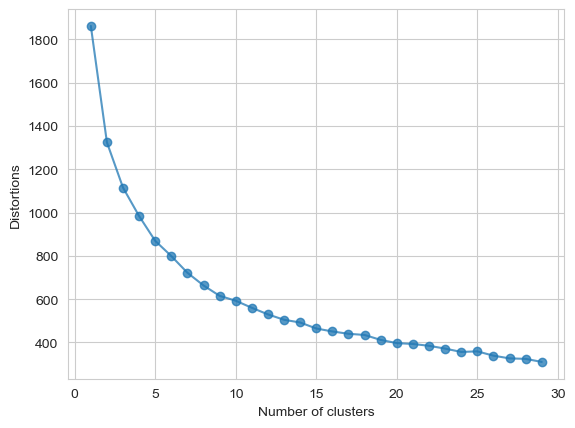

In [314]:
distortions = [] # sum of squared error within each cluster
for i in range(1, 30):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(scaled_data)
    distortions.append(km.inertia_)

plt.plot(range(1,30), distortions, marker='o', alpha=0.75)
plt.xlabel('Number of clusters')
plt.ylabel('Distortions')


In [315]:
X = data.iloc[:, 5:]
y = data.iloc[:, 4]

k = 3
kmeans = KMeans(n_clusters = k, n_init = 10, max_iter=1000)
y_pred = kmeans.fit_predict(scaled_data)
pd.value_counts(y_pred)

2    68
1    37
0    28
dtype: int64

C:\Users\eilaf\anaconda3\envs\datakougi\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 0.92, 'Cluster of three features')

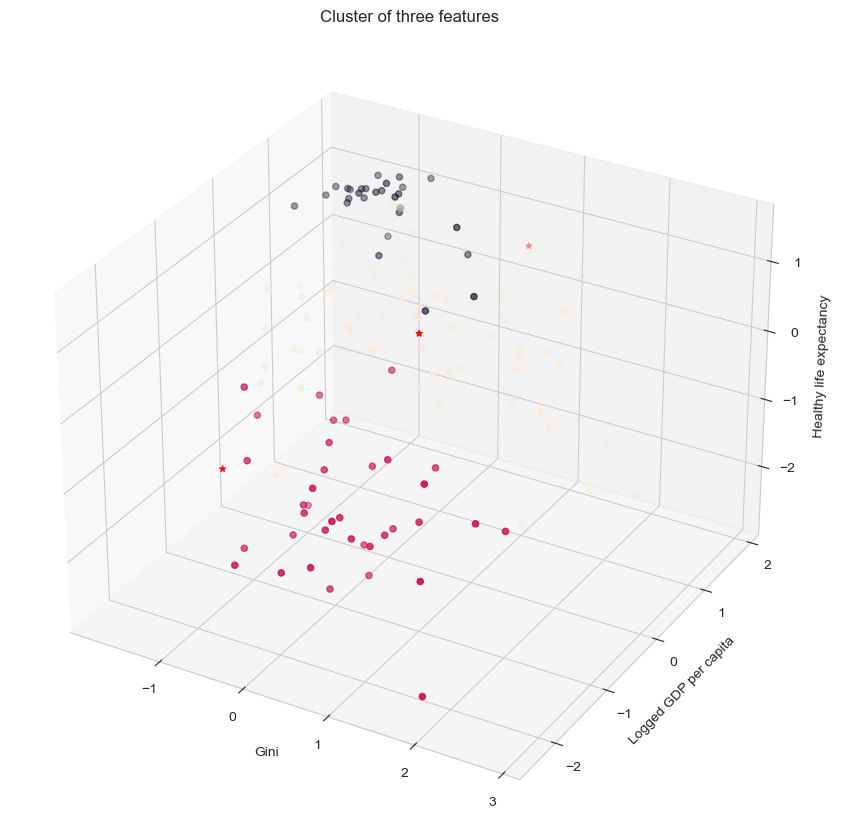

In [317]:
#plot the data in 3D with 3 features
sampled = scaled_data.sample(replace = False, frac = 1)
datax = sampled['Gini index 2010_2020']
datay = sampled['Logged GDP per capita']
dataz = sampled['Healthy life expectancy']
#labels_ = sampled.map(lambda x: cluster.predict(x)) not working
labels = kmeans.predict(sampled)

fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig)

ax.scatter(datax, datay, dataz, c = labels)
ax.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0],
           kmeans.cluster_centers_[:,2], marker = '*', color = 'red')
ax.set_xlabel('Gini')
ax.set_ylabel('Logged GDP per capita')
ax.set_zlabel('Healthy life expectancy')
ax.set_title('Cluster of three features')

<AxesSubplot:xlabel='Gini index 2010_2020', ylabel='Logged GDP per capita'>

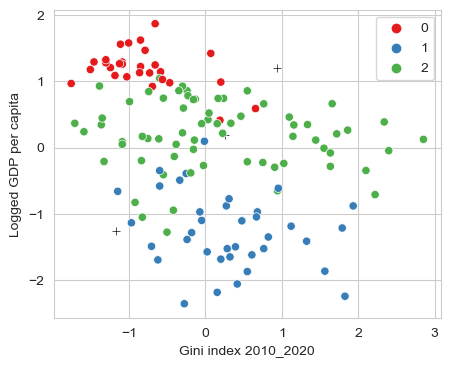

In [318]:
fig = plt.figure(figsize = (5,4))

# plt.scatter(datax, datay, c = labels)
# plt.xlabel('in_pkts')
# plt.ylabel('in_bytes')

sb.scatterplot(x = kmeans.cluster_centers_[:,1], y = kmeans.cluster_centers_[:,0],
               marker='+', color='black')
sb.scatterplot(x = datax, y = datay, hue= labels,
               palette=sb.color_palette("Set1", n_colors=k)) #n_colors = k
#fig.savefig('Figures/20220108_2100-2200_2D', bbox_inches = 'tight')

In [300]:
clusters=pd.DataFrame(data, columns=data.columns)
clusters['label']=kmeans.labels_

In [319]:
cluster0 = clusters[clusters['label'] == 0]
cluster1 = clusters[clusters['label'] == 1]
cluster2 = clusters[clusters['label'] == 2]
cluster3 = clusters[clusters['label'] == 3]

In [322]:
clusters.groupby('label').get_group(0)

,index,Country name,Country Code,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,...,Poverty ratio $2.15 % 2010_2020,Gini index 2010_2020,Employment ratio % 2010_2020,Unemployment % 2010_2020,Net migration 2010_2020,"Population, total 2010_2020",Urban population % 2010_2020,International tourism 2010_2020,Suicide2019,label
0,0,Finland,FIN,Western Europe,7.8087,10.639267,0.954330,71.900826,0.949172,-0.059482,...,0.1,28.3,57.563999,10.360000,18026.0,5521606.0,85.446,4226000.0,15.3,0
1,1,Denmark,DNK,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,...,0.5,28.7,63.359001,7.800000,23337.0,5814422.0,87.994,33093000.0,10.7,0
2,2,Switzerland,CHE,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,...,0.1,34.3,65.905998,4.920000,94153.0,8575280.0,73.849,11818000.0,14.5,0
3,3,Iceland,ISL,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,...,0.2,31.8,75.432999,7.560000,8316.0,360563.0,93.855,2488000.0,11.9,0
4,4,Norway,NOR,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,...,0.3,31.6,65.700996,4.680000,47786.0,5347896.0,82.616,6252000.0,11.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,147,Botswana,BWA,Sub-Saharan Africa,3.4789,9.711204,0.779122,58.924454,0.821328,-0.250394,...,17.7,60.5,52.133999,22.610001,4834.0,2499702.0,70.172,2344000.0,16.1,0
129,148,Tanzania,TZA,Sub-Saharan Africa,3.4762,7.967665,0.688933,57.496075,0.821540,0.109669,...,56.2,40.5,85.433998,3.470000,201562.0,59872579.0,34.500,1527000.0,4.3,0
130,149,Central African Republic,CAF,Sub-Saharan Africa,3.4759,6.625160,0.319460,45.200001,0.640881,0.082410,...,61.9,56.2,67.973000,5.716000,-13609.0,5209324.0,41.770,120500.0,12.3,0
131,150,Rwanda,RWA,Sub-Saharan Africa,3.3123,7.600104,0.540835,61.098846,0.900589,0.055484,...,66.1,52.0,84.151001,1.170000,-2605.0,12835028.0,17.313,1711000.0,5.6,0


In [ ]:
clusters.groupby('label').get_group(5).mean()

In [ ]:
clusters.groupby('label').get_group(2).mean()